## Imports

In [1]:
import numpy as np
from sympy import *

init_printing(pretty_print=True)

Populating the interactive namespace from numpy and matplotlib


## Part (a) Expression for gravitational potential 

If we consider "point masses" to be infinitesimal mass segments of the ring:

$$ \Phi = - \int \frac{G dm }{s} = - G \int \frac{dm }{ s} $$

Where s is the distance between the observer and the segment of the ring

$$ dm = (\text{linear mass density})(\text{ring segment}) = ( \mu )( d\ell) $$

We are assuming the ring has unifrom mass density
$$\mu = \frac{\text{Total Mass}}{\text{Entire ring}} = \frac{M}{2\pi R} $$

A tiny ring segment is: $d\ell = R d\theta$


Therefore: $dm =  (\frac{M}{2\pi R})(R d\theta) $ where $0 \leq \theta \leq 2\pi$


The observer is located at some distance from the centre of the ring, lets call it r.
The mass segment is located somwhere on the ring, so it is always a distance R from the centre of the ring.  

Using the law of cosines, the distance between the ring segement and the observer is:
$$ s = \sqrt{ R^2 + r^2 - 2rR\cos(\theta) } $$


We know that r < R , so r/R < 1.  If we pull out $R^2$ from the expression we get:
$$ s = R \sqrt{ 1 + (\frac{r}{R})^2 - 2(\frac{r}{R})\cos(\theta) } $$


Subsituting these two new expressions into the equation for gravitational potential
$$ \Phi = - G(\frac{M}{2\pi R}) \int \frac{ R d\theta}{ R \sqrt{ 1 + (\frac{r}{R})^2 - 2(\frac{r}{R})\cos(\theta) } } $$

Simplifying and letting $ \frac{r}{R} = x $
$$ \Phi = - G(\frac{M}{2\pi R}) \int \frac{d\theta}{\sqrt{ 1 + x^2 - 2x\cos(\theta) } } $$



If we integrate over half the circle then muliply by two:
$$ \Phi = - 2 G(\frac{M}{2\pi R}) \int_0^{\pi} \frac{d\theta}{\sqrt{ 1 + x^2 - 2x\cos(\theta) } } $$

In [2]:
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)#n is a symbol but it is only an intger 
f, genfun, phi = symbols('f genfun phi', cls=Function)

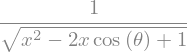

In [3]:
# define the integrand that here represents
# the so-called generating function of
# the Legendre polynomials
genfun = 1/sqrt(1 + x**2 - 2*x*cos(theta))
genfun

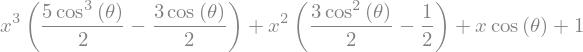

In [4]:
# expand the integrand into a series (remove higher order / smaller terms )
genfunc_trunc = (genfun.series(x,0,4)).removeO()
genfunc_trunc

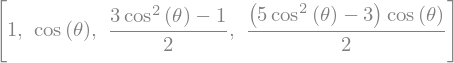

In [5]:
coeff = [genfunc_trunc.coeff(x,i).factor() for i in range(4)]
coeff

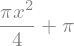

In [6]:
integral = integrate(genfunc_trunc, (theta,0,pi))
integral

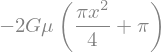

In [7]:
phi = -2*mu*G*integral
phi

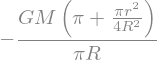

In [8]:
# substitute mu expressed via M, R, and r in phi
f = phi.subs({mu:M/(2*pi*R) , x:r/R})
f

Therefore, the gravitational potential acting on the point r due to the ring of mass is 

$$\Phi = \frac{-GM}{R}( 1 + \frac{r^2}{4 R^2} + . . . )$$

## Part (b) Numerical average gravitational potential by Jupiter on Earth

In [9]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.496e11  # radius of Earth's orbit in m

In [10]:
fJE = (f.subs({G:GN, M:MJ, R:RJ, r:RE})).simplify()

print ("The gravitational potential of Jupiter's ring at Saturn's orbit is {:.3f} SI units".format(fJE))

The gravitational potential of Jupiter's ring at Saturn's orbit is -164410.261 SI units


## Part (c) Approximating gravitational potential with a sum

In this part we are breaking the integral up into a sum.  Replacing the integrand symbol with a sum we get:

$$ \Phi = - G \sum \frac{ m_i }{ s_i } = - \frac{G}{R} \sum \frac{ m_i }{ \sqrt{ 1 + x^2 - 2x\cos(\theta_i) } } $$

Where s was replaced with the same expression as in part (a)

Where $m_i$ is the mass of a segment of the ring, and $s_i$ is the location of that segment (depends on $\theta_i$)   
The mass segments are equal such that $M = N m_i$ or $ m_i = M/N$.  $m_i$ can be pulled out of the integrand since it does not depend on i  
N is the total number of segements the ring is being broken up into 

$$ \Phi = - \frac{G m_i }{R} \sum \frac{ 1 }{ \sqrt{ 1 + x^2 - 2x\cos(\theta_i) } } $$


We want the mass segments to be placed equally around the ring.  
For N = 2: The two mass segments are at 0 and $\pi$  
For N = 4: The four mass segments are at 0 , $\frac{\pi}{2}$ , $\pi$  ,  and  $\frac{3\pi}{2}$  

In general, masses are located at (R,$\theta_i$) = ( R , i $\frac{2\pi}{N}$ ) where i is an index

$$ \Phi = - \frac{G m_i }{R} \sum_{i=1}^{N} \frac{ 1 }{ \sqrt{ 1 + x^2 - 2x\cos( i \frac{2\pi}{N} ) } } $$

If we consider the terms when $\theta_i$ is equal 0, they simplify to:

$$\frac{1}{\sqrt{ 1 + x^2 - 2x\cos( \theta_i ) }} = \frac{1}{\sqrt{1+x^2+-2x}} = \frac{1}{x-1}$$


If we consider the terms when $\theta_i$ is equal $\pi$, they simplify to:

$$\frac{1}{\sqrt{ 1 + x^2 - 2x\cos( \theta_i ) }} = \frac{1}{\sqrt{1+x^2+2x}} = \frac{1}{x+1}$$


If we pull these terms out of the sum when N = 2:
$$ \frac{1}{x-1} +  \frac{1}{x+1}$$


If we pull these terms out of the sum when N = 4:   
- We are pulling out the first and third terms 
- For the remaining two terms: $cos(\frac{\pi}{2}) = cos(\frac{3\pi}{2})$
$$ \frac{1}{x-1} +  \frac{1}{x+1} + \sum_{i=1}^{1 }  \frac{ 2 }{ \sqrt{ 1 + x^2 - 2x\cos( \theta_i ) } } $$

If we pull these terms out of the sum when N = 6:   
- We are pulling out the first and third terms 
- For the remaining four terms: $cos(\frac{\pi}{3}) = cos(\frac{5\pi}{3})$ and $cos(\frac{2\pi}{3}) = cos(\frac{4\pi}{3})$
$$ \frac{1}{x-1} +  \frac{1}{x+1} + \sum_{i=1}^{2 }  \frac{ 2 }{ \sqrt{ 1 + x^2 - 2x\cos( \theta_i ) } } $$


The two in the numerator reflects the symmetry of cosine.


If we generalize to any N = 2n:
$$ \frac{1}{x-1} +  \frac{1}{x+1} + \sum_{i=1}^{ N/2 -1 }  \frac{ 2 }{ \sqrt{ 1 + x^2 - 2x\cos( \theta_i ) } } $$

We can now say:

$$ \Phi = - \frac{G m_i }{R} \left[ \frac{1}{x-1} +  \frac{1}{x+1} + \sum_{i=1}^{ N/2 -1 }  \frac{ 2 }{ \sqrt{ 1 + x^2 - 2x\cos(i \frac{2\pi}{N} ) } } \right] $$

In [11]:
def grav_pot( N ):
    #----Constants
    G = 6.674e-11  # Newton's gravitational constant in SI units
    M = 1.90e27    # Jupiter's mass in kg
    R = 7.784e11   # radius of Jupiter's orbit in m
    r = 1.496e11   # radius of Earth's orbit in m
    #----
    
    mi = M / N     # mass of mass segment
    x = r/R        # Inside the ring of mass
    dtheta = (2*np.pi)/(N) #Change in angle 
    
    #print("N is {}".format(N))
    i = 1
    summ = 0
    while i <= N :
        #print("The index is {}".format(i))
        #print("The angle is {}".format(i* dtheta))
        
        termi = 1/( np.sqrt( 1 + x**2 -2*x*np.cos( i* dtheta) )  )
        summ = summ + termi
        #print("The term is {}".format(termi))
        i = i + 1
    
    phi = -( (G*mi)/(R) )*(summ )
    
    return phi

In [12]:
ind = [2,4,8,16,32]

print('N | Gravitational Potential')
for i in ind:
    print(i , grav_pot(i))

N | Gravitational Potential
2 -169153.9412784066
4 -164566.08116919952
8 -164442.46210164804
16 -164442.34087241878
32 -164442.3408722578


In [13]:
diff = grav_pot(4)-grav_pot(2)
i = 2
while diff > 1/10e4:
    pot_bef = grav_pot(i)
    pot_next = grav_pot(i*2)
    i = i*2
    diff = abs(  pot_bef - pot_next)
print(i,diff)

32 1.6097328625619411e-07


It required 32 masses such that the difference between succesive terms was no more than $1/10^4$

The gravitational potential when the ring is divided into 32 masses is -164442.340 N/kg

This is similar to, but slightly more than, the result of the integration.  The integration yielded a result of -164410.261 N/kg 

## Part (d) Varying r and plotting

In [14]:
alpha = [0,0.2,0.4,0.6,0.8] #the constants which are multiplied by r
alphar = [ (1.496e11)*val for val in alpha ]

In [15]:
def grav_potc( a , N ):
    'The gravitaional potential function from part b except now r is a*r for some constant a'
    
    #----Constants
    G = 6.674e-11  # Newton's gravitational constant in SI units
    M = 1.90e27    # Jupiter's mass in kg
    R = 7.784e11   # radius of Jupiter's orbit in m
    r = 1.496e11   # radius of Earth's orbit in m
    #----
    
    mi = M / N     # mass of mass segment
    x = (a*r)/R        # Inside the ring of mass
    dtheta = (2*np.pi)/(N) #Change in angle 
    
    #print("N is {}".format(N))
    i = 1
    summ = 0
    while i <= N :
        #print("The index is {}".format(i))
        #print("The angle is {}".format(i* dtheta))
        
        termi = 1/( np.sqrt( 1 + x**2 -2*x*np.cos( i* dtheta) )  )
        summ = summ + termi
        #print("The term is {}".format(termi))
        i = i + 1
    
    phi = -( (G*mi)/(R) )*(summ )
    
    return phi

In [16]:
def good_grav( a ):
    '''The accuracy routine from part b in a function 
    
    When given a constant a, this function returns the value of gravitational potential corresponding to a*r
    The ring of mass is divided into N parts such that the difference in succesive results its less than 1/10^4
    '''
    diff = grav_potc(a,4)-grav_potc(a,2)
    i = 2
    while diff > 1/10e4:
        pot_bef = grav_potc(a,i)
        pot_next = grav_potc(a,i*2)
        i = i*2
        diff = abs(  pot_bef - pot_next)
        
    return grav_potc(a,i)

In [17]:
potar = [ good_grav(i) for i in alpha ]

In [18]:
def theoretical_gravpot(  s ):
    'The theoretical gravitational potential equation from part (a)'
    
    thing1 = 1 + ((s*RE)**2)/(4*(RJ**2))
    thing2 = -(GN*MJ)/(RJ) * thing1
    return thing2  

In [37]:
s = linspace(0,1,100)
theor_grav = theoretical_gravpot(s)

In [23]:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Text(0, 0.5, '$| \\phi(r) - \\phi(0) |$')

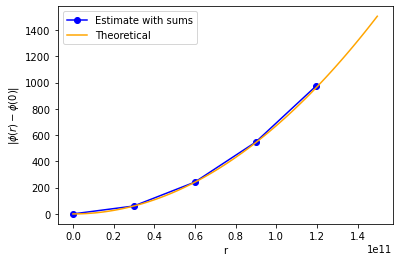

In [47]:
plot(alphar , abs(potar - good_grav(0)) , '-o',color='blue' ,label='Estimate with sums')
plot( s*RE , abs(theor_grav - good_grav(0)) ,color='orange',label='Theoretical')

legend()
xlabel('r')
ylabel('$| \phi(r) - \phi(0) |$')

The difference in $| \phi(r) - \phi(0) |$ matches the theoretical gravitationl potential from part (a), $\Phi = \frac{-GM}{R}( 1 + \frac{r^2}{4 R^2} + . . . )$ , very well

The resulting plot is quadratic as expected. 